# Assignment 6: Boston House Prediction using DNN (scikit-learn)

In [1]:
import numpy as np
import pandas as pd

In [2]:
ds =pd.read_csv('HousingData.csv')
ds

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
ds.dropna(inplace=True)

In [4]:
def min_max_normalize(name):
  max_ = ds[name].max()
  min_ = ds[name].min()
  ds[name] = (ds[name] - min_) / ( max_ - min_ )

for col in ds.drop(["MEDV"], axis=1).columns:
    min_max_normalize(col)

In [5]:
from sklearn.model_selection import train_test_split

x = np.array(ds.drop(["MEDV"], axis=1))
y = np.array(ds["MEDV"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22)
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(275, 13)
(119, 13)
(275, 1)
(119, 1)


In [6]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(
    hidden_layer_sizes=(32, 64, 32, 16),
    activation="relu",
    solver="adam",
    alpha=0.0001,
    batch_size=16,
    max_iter=1000,
    random_state=42,
    verbose=True,
)
reg.fit(x_train, y_train)

Iteration 1, loss = 280.61958218
Iteration 2, loss = 254.23166113
Iteration 3, loss = 193.87137432
Iteration 4, loss = 100.78786629
Iteration 5, loss = 62.50494435
Iteration 6, loss = 52.64782169
Iteration 7, loss = 43.36899907
Iteration 8, loss = 35.93486430
Iteration 9, loss = 29.98399584
Iteration 10, loss = 25.27815240
Iteration 11, loss = 22.73576471
Iteration 12, loss = 20.72812805
Iteration 13, loss = 19.07157895


c:\Users\SHASHIKANT LOHAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 14, loss = 18.03066775
Iteration 15, loss = 16.76618529
Iteration 16, loss = 15.15152124
Iteration 17, loss = 14.19007699
Iteration 18, loss = 13.48322458
Iteration 19, loss = 12.87299570
Iteration 20, loss = 11.81002049
Iteration 21, loss = 11.49028503
Iteration 22, loss = 10.68536470
Iteration 23, loss = 10.23995886
Iteration 24, loss = 10.48243218
Iteration 25, loss = 10.20656352
Iteration 26, loss = 9.78099637
Iteration 27, loss = 9.34013847
Iteration 28, loss = 9.00648728
Iteration 29, loss = 8.95735674
Iteration 30, loss = 8.78924481
Iteration 31, loss = 8.69708029
Iteration 32, loss = 8.84026026
Iteration 33, loss = 8.32763198
Iteration 34, loss = 8.46652313
Iteration 35, loss = 8.11123118
Iteration 36, loss = 8.01567930
Iteration 37, loss = 8.47789047
Iteration 38, loss = 8.15500514
Iteration 39, loss = 8.15324764
Iteration 40, loss = 7.81571772
Iteration 41, loss = 8.06482167
Iteration 42, loss = 8.25024044
Iteration 43, loss = 8.07976496
Iteration 44, loss = 7.53825

MLPRegressor(batch_size=16, hidden_layer_sizes=(32, 64, 32, 16), max_iter=1000,
             random_state=42, verbose=True)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 9.83154871062708
Root Mean Squared Error: 3.1355300525791616
R-squared: 0.8668203612931867
Mean Absolute Error: 2.259953995661939


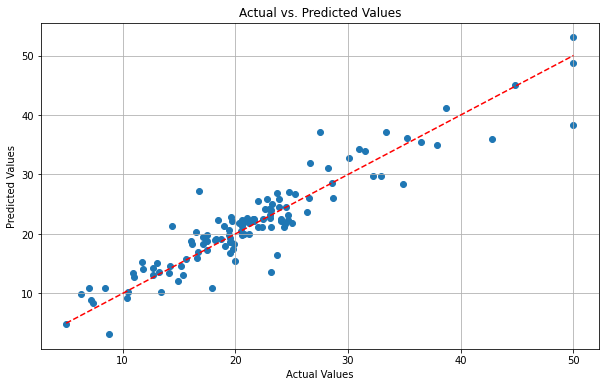

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Regression line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()